In [1]:
import tensorflow as tf
import numpy as np
import mlxtend.plotting
import matplotlib.pyplot as plot

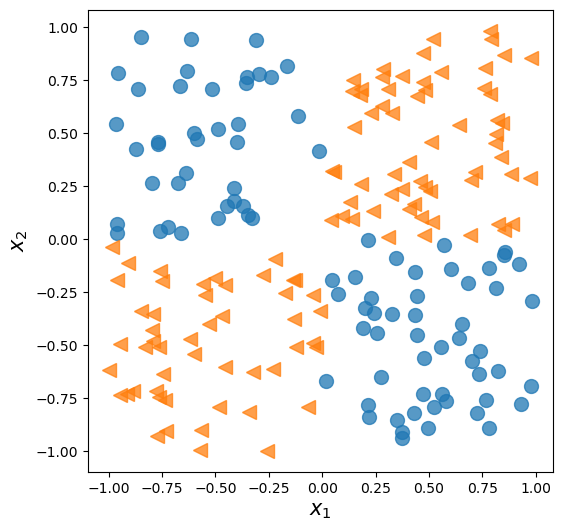

In [2]:
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:,0] * x[:, 1]<0] = 0
x_tr = x[:100, :]
y_tr = y[:100]
x_t = x[100:, :]
y_t = y[100:]

fig = plot.figure(figsize=(6,6))
plot.plot(x[y==0, 0],x[y==0, 1], 'o', alpha=0.75, markersize=10)
plot.plot(x[y==1, 0],x[y==1, 1], '<', alpha=0.75, markersize=10)
plot.xlabel(r'$x_1$', size=15)
plot.ylabel(r'$x_2$', size=15)
plot.show()

In [3]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
        
    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)
    
model = MyModel()
model.build(input_shape=(None, 2))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  12        
                                                                 
 dense_1 (Dense)             multiple                  20        
                                                                 
 dense_2 (Dense)             multiple                  20        
                                                                 
 dense_3 (Dense)             multiple                  5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_tr, y_tr, validation_data=(x_t, y_t), epochs=200, batch_size=2, verbose=1)

Epoch 1/200
50/50 [==============================] - 4s 25ms/step - loss: 0.6869 - binary_accuracy: 0.5000 - val_loss: 0.6776 - val_binary_accuracy: 0.6100
Epoch 2/200
50/50 [==============================] - 0s 8ms/step - loss: 0.6759 - binary_accuracy: 0.6900 - val_loss: 0.6638 - val_binary_accuracy: 0.8100
Epoch 3/200
50/50 [==============================] - 0s 9ms/step - loss: 0.6648 - binary_accuracy: 0.7400 - val_loss: 0.6507 - val_binary_accuracy: 0.8200
Epoch 4/200
50/50 [==============================] - 1s 14ms/step - loss: 0.6545 - binary_accuracy: 0.7400 - val_loss: 0.6394 - val_binary_accuracy: 0.8200
Epoch 5/200
50/50 [==============================] - 1s 10ms/step - loss: 0.6456 - binary_accuracy: 0.7500 - val_loss: 0.6289 - val_binary_accuracy: 0.8000
Epoch 6/200
50/50 [==============================] - 0s 9ms/step - loss: 0.6373 - binary_accuracy: 0.7600 - val_loss: 0.6192 - val_binary_accuracy: 0.8100
Epoch 7/200
50/50 [==============================] - 1s 10ms/step -

C:\Users\kachi\AppData\Local\Temp\ipykernel_15504\3684362544.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  mlxtend.plotting.plot_decision_regions(X=x_t, y=y_t.astype(np.integer), clf=model)


20000/20000 [==============================] - 74s 4ms/step


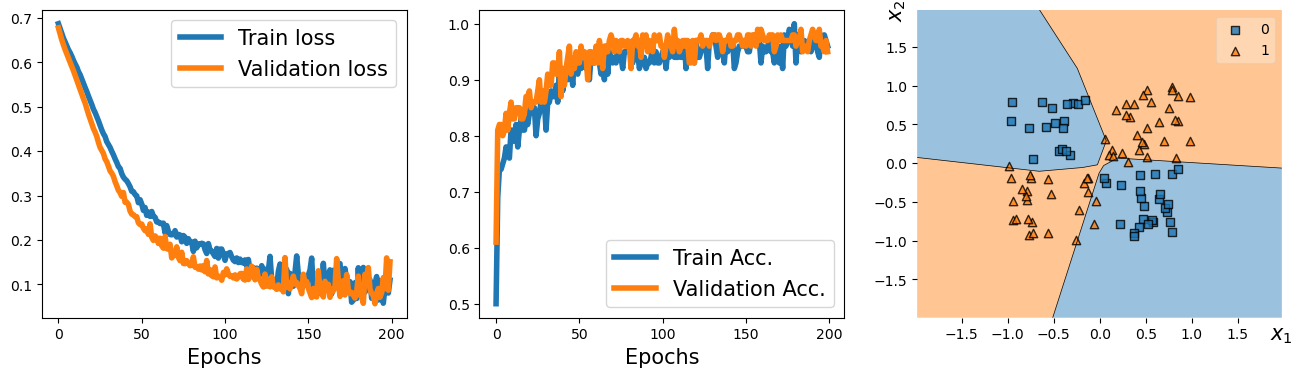

In [5]:
history = hist.history
fig=plot.figure(figsize=(16, 4))
ax = fig.add_subplot(1,3,1)
plot.plot(history['loss'],lw=4)
plot.plot(history['val_loss'],lw=4)
plot.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1,3,2)
plot.plot(history['binary_accuracy'],lw=4)
plot.plot(history['val_binary_accuracy'],lw=4)
plot.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1,3,3)
mlxtend.plotting.plot_decision_regions(X=x_t, y=y_t.astype(np.integer), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plot.show()